In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("logistic_regdata.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


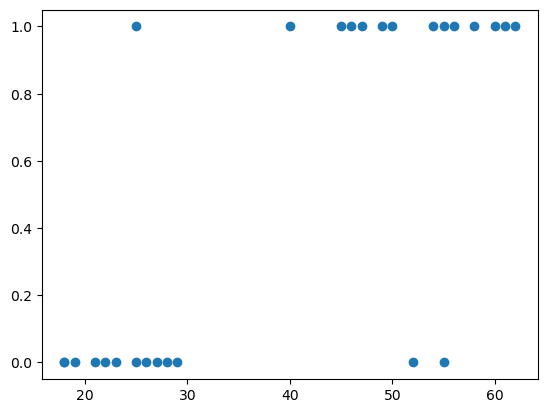

In [3]:
plt.scatter(df.age,df.bought_insurance)

In [4]:
df.shape


(27, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test =train_test_split(df[['age']],df.bought_insurance, train_size = 0.9)

In [9]:
x_test

,age
10,18
12,27
11,28


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
model.predict(x_test)

array([0, 0, 0], dtype=int64)

In [14]:
y_test

10    0
12    0
11    0
Name: bought_insurance, dtype: int64

In [17]:
model.score(x_test,y_test)

1.0

In [18]:
#probability of buying the insurance
model.predict_proba(x_test)

array([[0.91785458, 0.08214542],
       [0.7859674 , 0.2140326 ],
       [0.76443442, 0.23556558]])

In [21]:
model.predict([[44]])

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# MultiClass Classification 

In [7]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

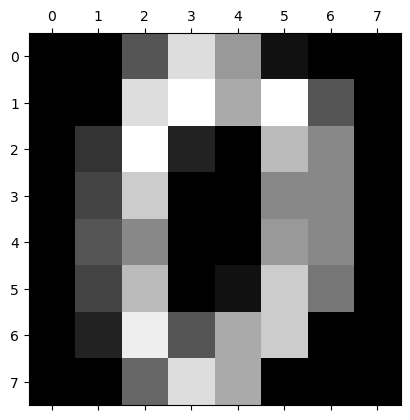

In [8]:
plt.gray()
plt.matshow(digits.images[0])

In [9]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [10]:
 from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size =0.2)

In [15]:
len(x_test)

360

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [17]:
model.fit(x_train,y_train)

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
model.score(x_test, y_test)

0.975

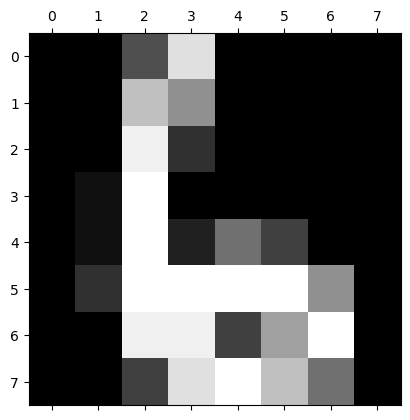

In [20]:
plt.matshow(digits.images[67])

In [21]:
digits.target[67]

6

In [22]:
model.predict([digits.data[67]])

array([6])

In [23]:
 model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [25]:
#to see where model is not doing well ---i.e. where our model
#is making error---where model fails
#one way is 
#Confusion matrix
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predicted)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 36,  0,  2],
       [ 0,  2,  0,  0,  1,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 37]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

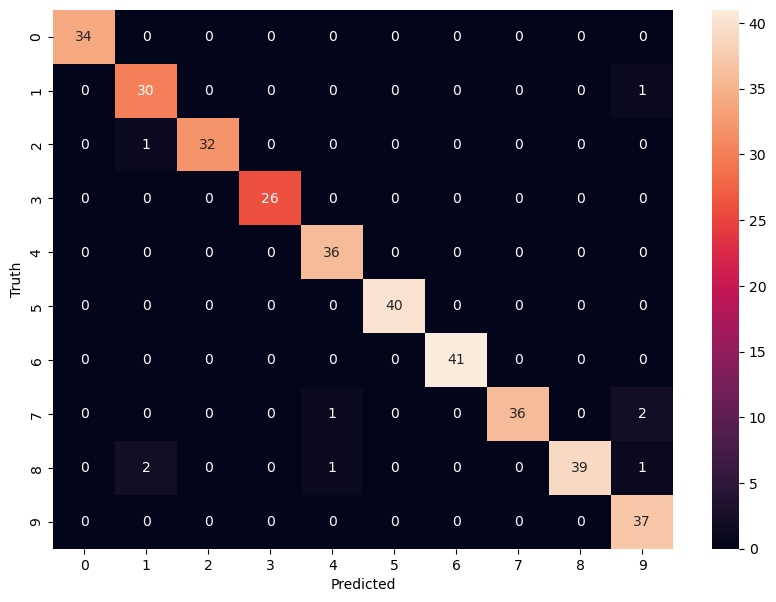

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')